In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

<a href="https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%203%20-%20NLP/Course%203%20-%20Week%204%20-%20Lesson%202%20-%20Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p "../data/Laurence's poetry/irish-lyrics-eof.txt"
!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt -O "../data/Laurence's poetry/irish-lyrics-eof.txt"

In [22]:
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm import tqdm
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import History, EarlyStopping, TensorBoard
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.backend import clear_session
from tensorflow.compat.v1 import reset_default_graph

In [4]:
clear_session()
reset_default_graph()
# 设置显存自动增长
physical_devices = tf.config.list_physical_devices('GPU')
for physical_device in physical_devices:
    tf.config.experimental.set_memory_growth(physical_device, enable=True)

In [5]:
tokenizer = Tokenizer()

data = open("../data/Laurence's poetry/irish-lyrics-eof.txt").read()
corpus: [str] = data.lower().split("\n")
tokenizer.fit_on_texts(corpus)
total_words: dict = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [7]:
input_sequences = []
for line in corpus:
    token_list: [int] = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence: [int] = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len: int = max([len(x) for x in input_sequences])
input_sequences: np.ndarray = pad_sequences(
    input_sequences, 
    maxlen=max_sequence_len, 
    padding='pre'
)

# create predictors and label
xs: np.ndarray = input_sequences[:,:-1]
labels: np.ndarray = input_sequences[:, -1]

# 将标签转换成onehot形式
ys = to_categorical(labels, num_classes=total_words)

In [9]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

8
1
71
6
713
39
1790
1791


In [10]:
print(xs[6])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]


In [11]:
print(ys[6])

[0. 0. 0. ... 0. 0. 0.]


In [12]:
print(xs[5])
print(ys[5])

[   0    0    0    0    0    0    0    0    0   51   12   96 1217   48
    2]
[0. 0. 0. ... 0. 0. 0.]


In [13]:
print(tokenizer.word_index)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [17]:
model = Sequential(name="irish_lyrics_genrator")
model.add(Embedding(input_dim=total_words, output_dim=100, name="embedding_1", input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences=False), name="LSTM_2"))
model.add(Dense(units=total_words, activation='softmax', name="dense_3"))
model.compile(
    loss='categorical_crossentropy', 
    optimizer=Adam(learning_rate=0.01), 
    metrics=['accuracy']
)

history: History = model.fit(
    x=xs, 
    y=ys, 
    epochs=100, 
    verbose=1,
    workers=-1,
    use_multiprocessing=True,
    callbacks=[
        EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, mode='auto'),
        TensorBoard(log_dir="../logs/irish-lyrics-genrator")
    ]
)

model.summary()
print(model)

Epoch 1/100
  1/377 [..............................] - ETA: 0s - loss: 7.8966 - accuracy: 0.0000e+00WARNING:tensorflow:From c:\users\drzon\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
377/377 [==============================] - 3s 8ms/step - loss: 6.6562 - accuracy: 0.0737
Epoch 2/100
377/377 [==============================] - 3s 8ms/step - loss: 5.7950 - accuracy: 0.1119
Epoch 3/100
377/377 [==============================] - 3s 8ms/step - loss: 4.9787 - accuracy: 0.1578
Epoch 4/100
377/377 [==============================] - 3s 8ms/step - loss: 4.0884 - accuracy: 0.2240
Epoch 5/100
377/377 [==============================] - 3s 8ms/step - loss: 3.2693 - accuracy: 0.3185
Epoch 6/100
377/377 [==============================] - 3s 8ms/step - loss: 2.5751 - accuracy: 0.

377/377 [==============================] - 3s 8ms/step - loss: 0.9199 - accuracy: 0.7578
Epoch 26/100
377/377 [==============================] - 3s 8ms/step - loss: 1.0120 - accuracy: 0.7329
Epoch 27/100
377/377 [==============================] - 3s 8ms/step - loss: 0.9956 - accuracy: 0.7361
Epoch 28/100
377/377 [==============================] - 3s 8ms/step - loss: 0.8953 - accuracy: 0.7633
Epoch 29/100
377/377 [==============================] - 3s 8ms/step - loss: 0.8333 - accuracy: 0.7800
Epoch 30/100
377/377 [==============================] - 3s 8ms/step - loss: 0.7888 - accuracy: 0.7928
Epoch 31/100
377/377 [==============================] - 3s 8ms/step - loss: 0.7725 - accuracy: 0.7965
Epoch 32/100
377/377 [==============================] - 3s 8ms/step - loss: 0.7839 - accuracy: 0.7935
Epoch 33/100
377/377 [==============================] - 3s 8ms/step - loss: 0.8123 - accuracy: 0.7861
Epoch 34/100
377/377 [==============================] - 3s 8ms/step - loss: 0.8986 - accuracy: 

377/377 [==============================] - 3s 8ms/step - loss: 0.9207 - accuracy: 0.7540
Epoch 78/100
377/377 [==============================] - 3s 8ms/step - loss: 0.9381 - accuracy: 0.7489
Epoch 79/100
377/377 [==============================] - 3s 8ms/step - loss: 0.9842 - accuracy: 0.7385
Epoch 80/100
377/377 [==============================] - 3s 8ms/step - loss: 0.8663 - accuracy: 0.7667
Epoch 81/100
377/377 [==============================] - 3s 8ms/step - loss: 0.7834 - accuracy: 0.7886
Epoch 82/100
377/377 [==============================] - 3s 8ms/step - loss: 0.7254 - accuracy: 0.8020
Epoch 83/100
377/377 [==============================] - 3s 8ms/step - loss: 0.7076 - accuracy: 0.8084
Epoch 84/100
377/377 [==============================] - 3s 8ms/step - loss: 0.6946 - accuracy: 0.8128
Epoch 85/100
377/377 [==============================] - 3s 8ms/step - loss: 0.6802 - accuracy: 0.8171
Epoch 86/100
377/377 [==============================] - 3s 8ms/step - loss: 0.6934 - accuracy: 

In [18]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

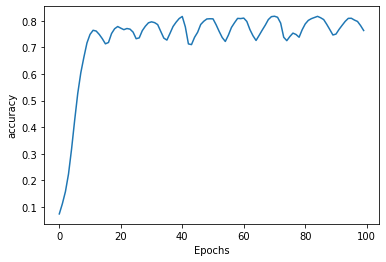

In [19]:
plot_graphs(history, 'accuracy')

In [24]:
seed_text = "I've got a bad feeling about this"
next_words = 100

reverse_dict = dict([(value, key) for (key, value) in tokenizer.word_index.items()])
for _ in tqdm(range(next_words)):
    token_list: [int] = tokenizer.texts_to_sequences([seed_text])[0]
    token_list: np.ndarray = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted: np.ndarray = model.predict_classes(token_list, verbose=0)
    output_word = reverse_dict.get(int(predicted), "")
    seed_text += " " + output_word
print(seed_text)

100%|██████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 39.70it/s]

I've got a bad feeling about this night where we have answer my for when i had rest sends my hat to my love gone away til hill had satisfaction gone over the ra li sweep be love kathleen shall again mary love gone kathleen know a stone be bride by light this love and well may be as at this love i love had smashed to seeing be love seen borne lying your i love had im i catch my love by a sea had in my gone and all gone over the sun shines ball smashed fol lullaby gone pie banbridge town in row to
